In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
cancer = load_breast_cancer()

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

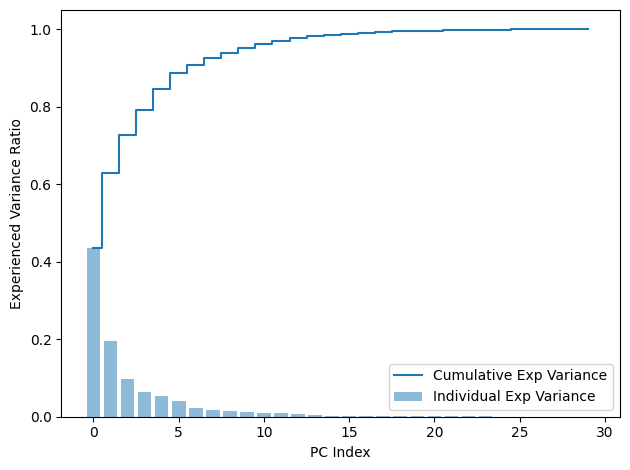

In [8]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual Exp Variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative Exp Variance')
plt.ylabel('Experienced Variance Ratio')
plt.xlabel('PC Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* Transforming data before fitting it to the Principal Component Analysis (PCA) model is crucial because it ensures that the PCA operates on data that has the same scale, preventing certain issues related to differing magnitudes among features. Here's why data transformation is essential before applying PCA:

**1. PCA Sensitivity to Scale:** PCA is sensitive to the scale of the input features because it relies on variances and covariances to identify principal components. Features with larger scales tend to dominate the variance, potentially leading to misleading or incorrect principal components.

**2. Equal Weight for All Features:** By transforming (typically standardizing or normalizing) the data, each feature contributes equally to the PCA model. This ensures that the PCA identifies the most significant patterns in the data, regardless of differences in scale.

* The attribute **pca.explained_variance_ratio_** in Principal Component Analysis (PCA) indicates the proportion of the total variance in the dataset that is captured by each principal component. It provides insights into the significance of each principal component in explaining the dataset's variability.

* The **np.cumsum()** function in NumPy is used to compute the cumulative sum of elements along a given axis. The result is an array where each element is the sum of all preceding elements in the original array, including the current element. It is useful in various scenarios, such as cumulative calculations, financial analysis, and plotting cumulative distributions.

* The **plt.step()** method in Matplotlib is used to create step plots, where changes in data are represented as discrete "steps" or horizontal-vertical lines. Step plots are useful for visualizing data that changes at specific intervals or follows a piecewise constant pattern, such as time series data, signal processing, or cumulative distributions.

In [9]:
pca.components_

array([[ 2.16014846e-01,  1.01699596e-01,  2.25181465e-01,
         2.18534830e-01,  1.48981569e-01,  2.40835871e-01,
         2.59499690e-01,  2.63324252e-01,  1.46217348e-01,
         6.57406649e-02,  2.03918546e-01,  2.34543987e-02,
         2.09023919e-01,  1.99502970e-01,  2.15718507e-02,
         1.65762530e-01,  1.49054410e-01,  1.82429814e-01,
         4.76642673e-02,  9.87533276e-02,  2.26391948e-01,
         1.05122879e-01,  2.36126297e-01,  2.24215789e-01,
         1.32347855e-01,  2.11297039e-01,  2.29556005e-01,
         2.52917161e-01,  1.27240897e-01,  1.32340793e-01],
       [-2.40040164e-01, -5.12630139e-02, -2.22160786e-01,
        -2.36489281e-01,  1.69316336e-01,  1.50134402e-01,
         6.40373456e-02, -3.96395631e-02,  1.83279546e-01,
         3.61447295e-01, -1.08859253e-01,  9.69510543e-02,
        -9.16036710e-02, -1.53645976e-01,  1.94465623e-01,
         2.37907034e-01,  2.07841771e-01,  1.43048104e-01,
         1.74509277e-01,  2.81101891e-01, -2.24547535e-